/Users/ashu/Developer/Idea Projects/Stochastic-Gradient-Descent/src/helpers.py:145: RuntimeWarning: overflow encountered in square
  train_loss = np.mean((train_predictions - y) ** 2)
/Users/ashu/Developer/VENV12/lib/python3.12/site-packages/numpy/_core/_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Completed training with batch size: 1
Completed training with batch size: 8
Completed training with batch size: 16
Completed training with batch size: 32


[I 2025-05-21 18:03:27,325] A new study created in memory with name: SGD_reg-l2_lr-0.01_schedule-time_decay_lambda-0.001


Completed training with batch size: 64
Completed training with batch size: 128
Completed training with batch size: 256
Completed training with batch size: 512
Completed training with batch size: 16512


  0%|          | 0/9 [00:00<?, ?it/s]

[I 2025-05-21 18:03:30,222] Trial 4 finished with value: 0.551228697183129 and parameters: {}. Best is trial 4 with value: 0.551228697183129.
[I 2025-05-21 18:03:30,382] Trial 2 finished with value: 0.5634082586286735 and parameters: {}. Best is trial 4 with value: 0.551228697183129.
[I 2025-05-21 18:03:30,395] Trial 6 finished with value: 0.558937496301039 and parameters: {}. Best is trial 4 with value: 0.551228697183129.
[I 2025-05-21 18:03:30,401] Trial 5 finished with value: 0.5547042051464857 and parameters: {}. Best is trial 4 with value: 0.551228697183129.
[I 2025-05-21 18:03:30,408] Trial 3 finished with value: 0.5499337850364613 and parameters: {}. Best is trial 3 with value: 0.5499337850364613.
[I 2025-05-21 18:03:30,679] Trial 1 finished with value: 1.1802419181368204e+122 and parameters: {}. Best is trial 3 with value: 0.5499337850364613.
[I 2025-05-21 18:03:31,190] Trial 8 finished with value: 3.0410711034939917 and parameters: {}. Best is trial 3 with value: 0.54993378503

/Users/ashu/Developer/Idea Projects/Stochastic-Gradient-Descent/src/helpers.py:145: RuntimeWarning: overflow encountered in square
  train_loss = np.mean((train_predictions - y) ** 2)
/Users/ashu/Developer/VENV12/lib/python3.12/site-packages/numpy/_core/_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/ashu/Developer/Idea Projects/Stochastic-Gradient-Descent/src/helpers.py:145: RuntimeWarning: overflow encountered in square
  train_loss = np.mean((train_predictions - y) ** 2)


[I 2025-05-21 18:03:32,233] Trial 7 finished with value: 0.5694674436212507 and parameters: {}. Best is trial 3 with value: 0.5499337850364613.


/Users/ashu/Developer/VENV12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:585: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


[I 2025-05-21 18:03:33,699] Trial 0 finished with value: inf and parameters: {}. Best is trial 3 with value: 0.5499337850364613.


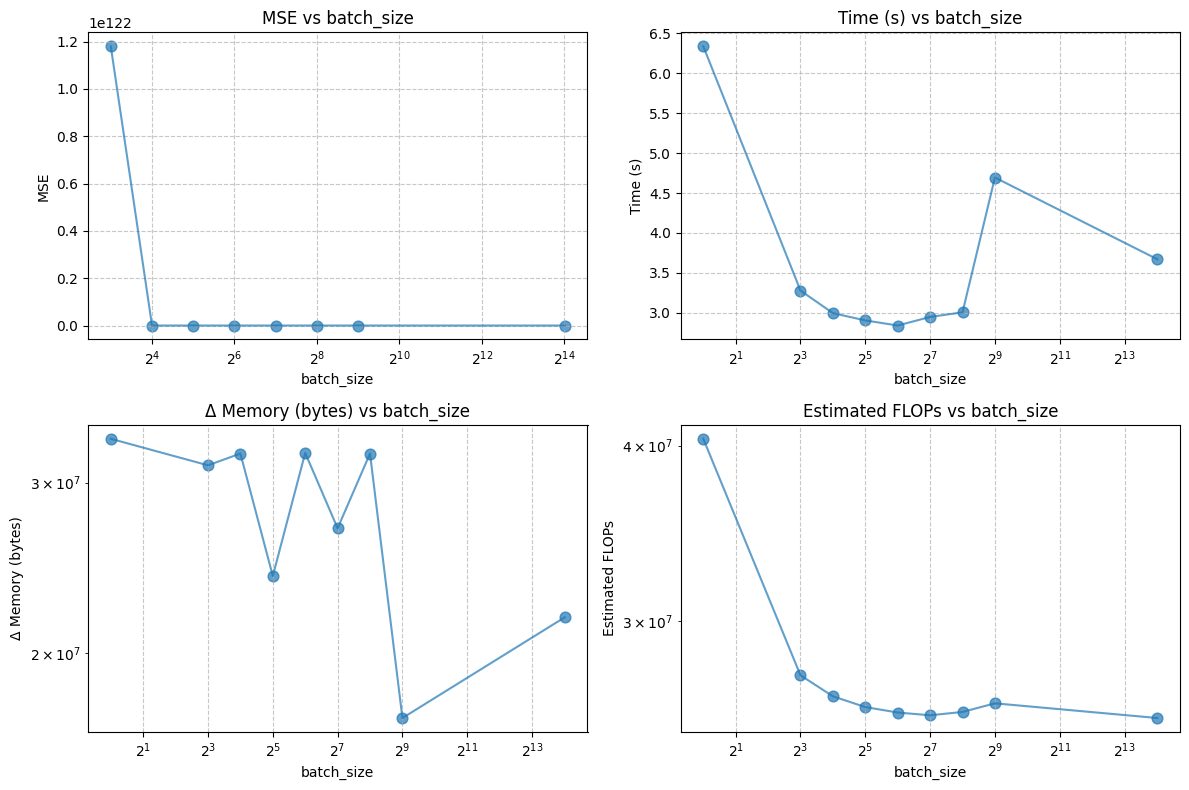

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from src.data import load_california
from src.helpers import SGD, plot_performance_metrics

np.random.seed(42)

X, y = load_california(scale=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

batch_sizes = [1, 8, 16, 32, 64, 128, 256, 512, X_train.shape[0]]

models = []
for batch_size in batch_sizes:
    model = SGD(
        learning_rate=0.01,
        epochs=50,
        batch_size=batch_size,
        regularization='l2',
        reg_param=0.001,
        lr_schedule='time_decay',
        random_state=42
    )
    model.fit(X_train, y_train)
    models.append(model)
    print(f"Completed training with batch size: {batch_size}")

plot_performance_metrics(models)